In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.max_open_warning'] = 100

In [11]:
data = pd.read_csv('./data/exekuce_psp13.csv')
data.fillna(value=0, inplace=True)

In [45]:
kstrany = pd.read_excel('./data/kstrana.xlsx')
ks = {}
for row in kstrany.iterrows():
    ks['kstrana_' + str(row[1]['kstrana'])] = row[1]['zkratka']

In [72]:
cr = pd.DataFrame()
for c in corr:
    cr = cr.append({'zkr': ks[c], 'r': corr[c]}, ignore_index=True)

In [84]:
cr.sort_values(by='r', ascending=False)

r       zkr
7   0.273397      KSČM
5   0.168504      DSSS
8   0.063794  Suveren.
15  0.059634  HLVZHŮRU
13  0.054629        KČ
10  0.053828    LEV 21
11  0.044047      ČSSD
0   0.032975      SsČR
6   0.030880  ANO 2011
17  0.030520     Úsvit
16  0.024040       RDS
3   0.013612    Piráti
14  0.004737     Změna
18  0.002282        SZ
2   0.001858  OBČ_2011
20  0.001858        PB
4  -0.013175       ODS
1  -0.017867       KAN
19 -0.020545      ANEO
22 -0.024511      SPOZ
12 -0.045866  Svobodní
9  -0.111476    TOP 09
21 -0.284040   KDU-ČSL

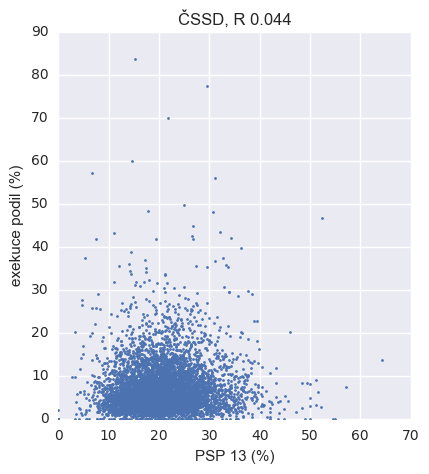

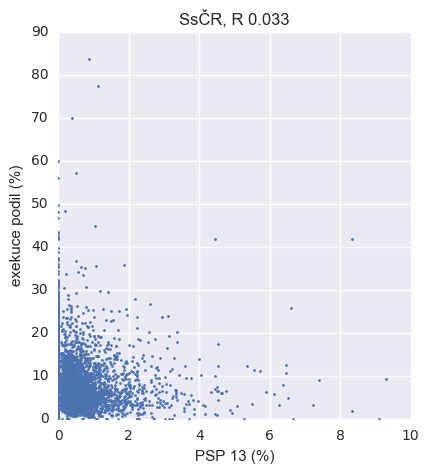

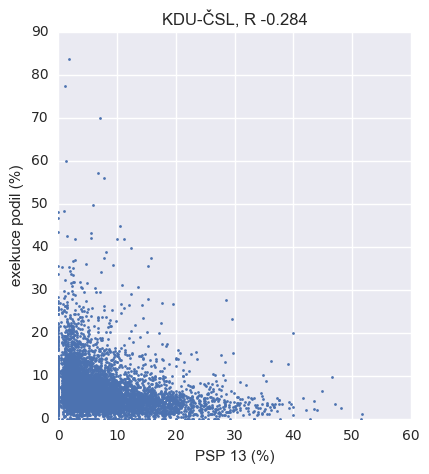

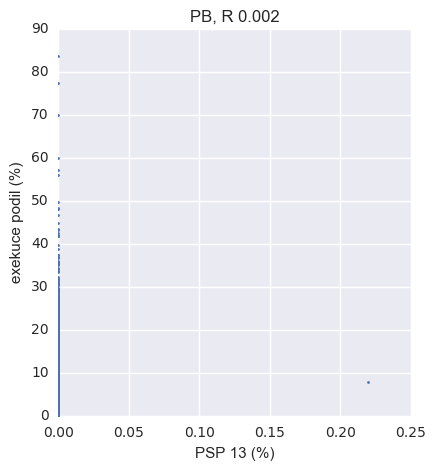

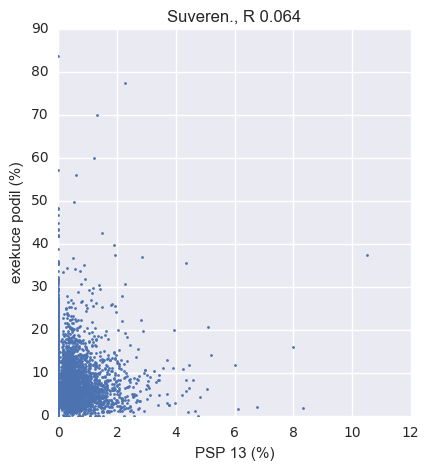

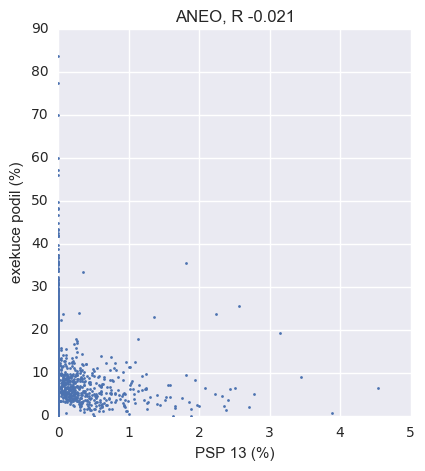

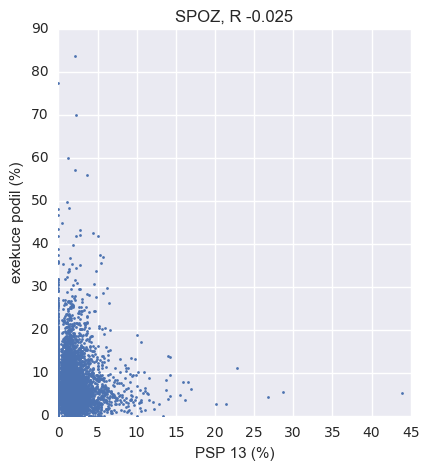

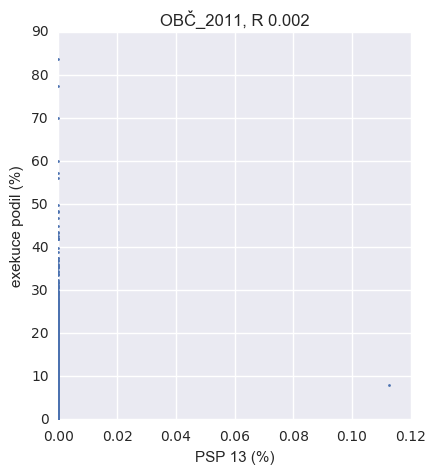

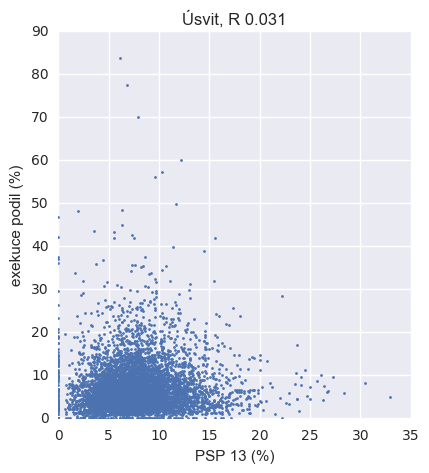

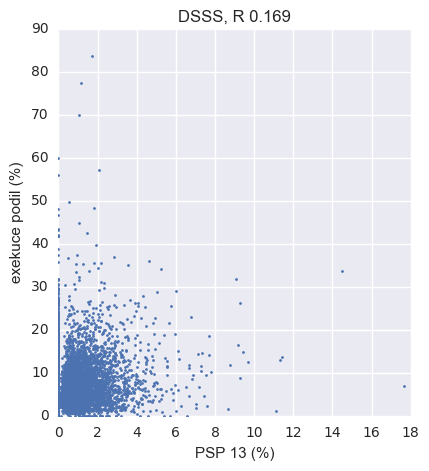

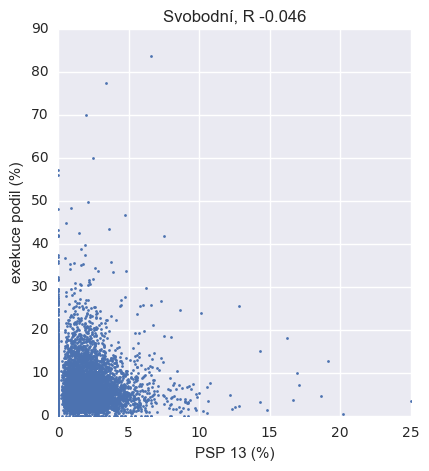

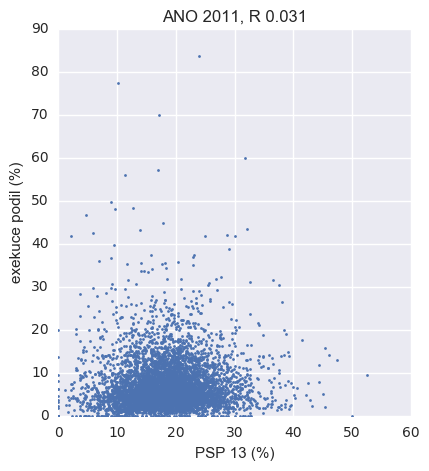

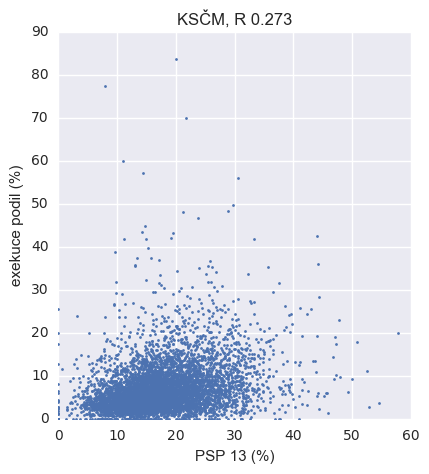

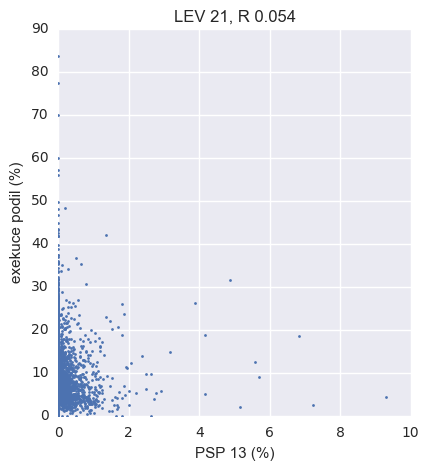

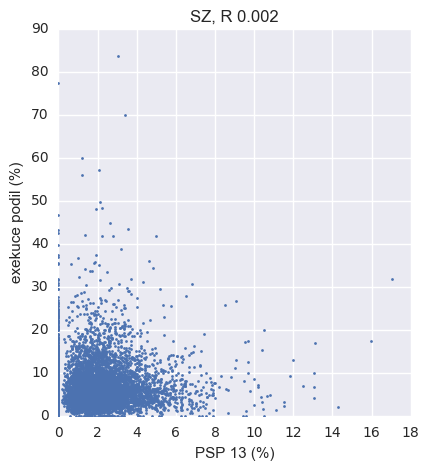

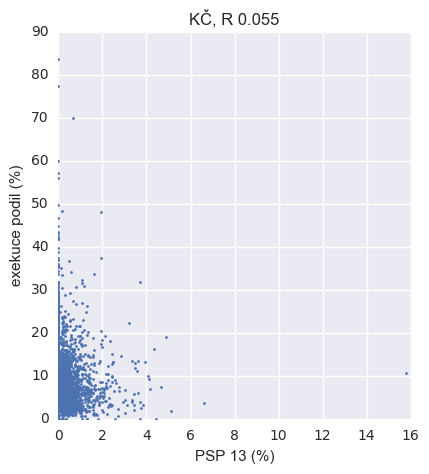

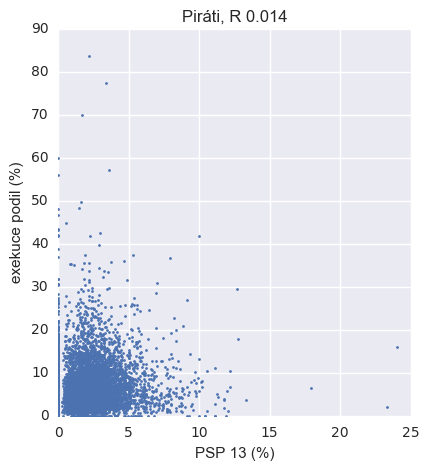

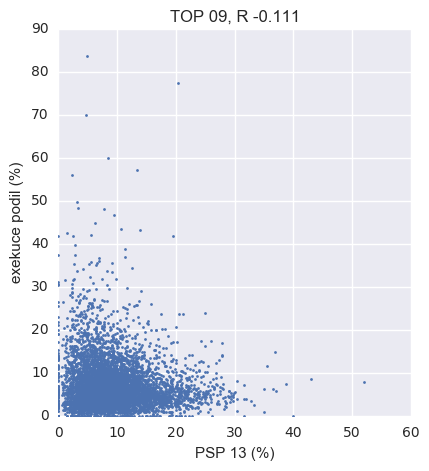

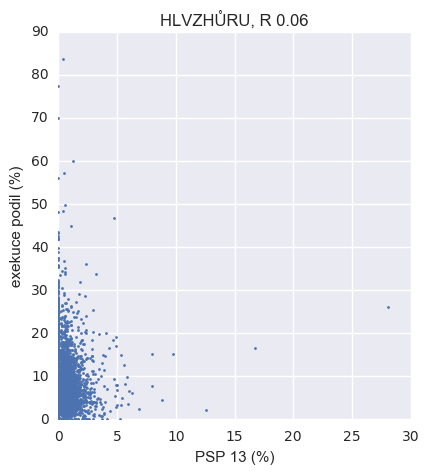

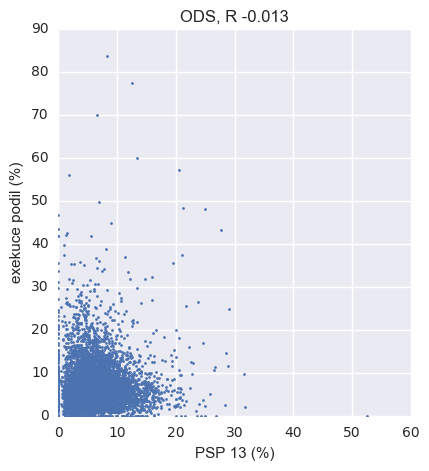

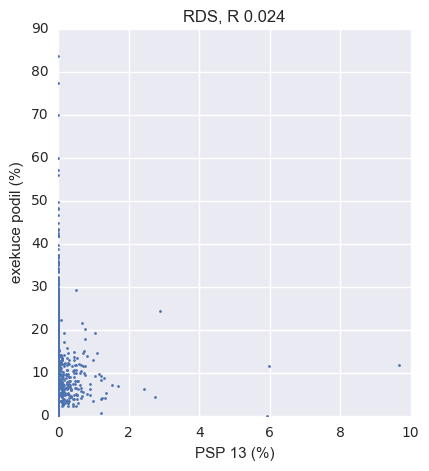

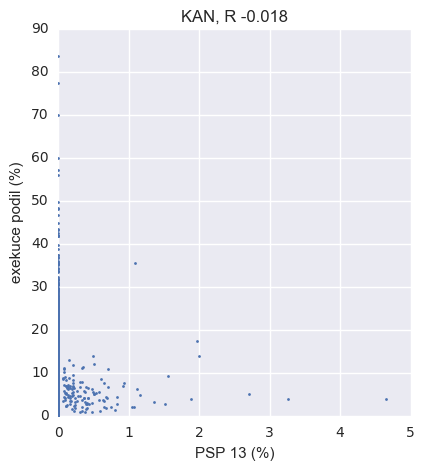

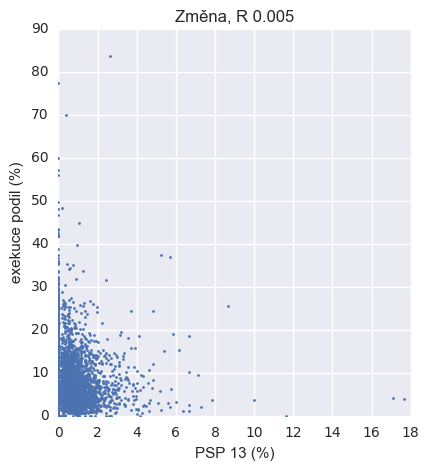

In [83]:
fgr = 0

corr = {}
for col in data.columns:
    if col.startswith('kstrana'):
        corr[col] = np.corrcoef(data[col].values, data['podíl_exec'].values)[0][1]
        
        fgr += 1
        plt.figure(fgr)
        plt.subplot(121)
        plt.title(ks[col] + ', R ' + str(round(corr[col], 3)))
        plt.xlabel('PSP 13 (%)')
        plt.ylabel('exekuce podil (%)')
        plt.plot(data[col].values, data['podíl_exec'].values, 'o', markersize=2)
plt.show()